# Dense Neural Network (DNN)
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Mathematical Fundations](#mathematical-foundations)
3. [Learning Algorithm](#learning-algorithm)
4. [Creating a DNN classifier with TensorFlow's Keras API in Fashion MNIST dataset](#creating-a-dnn-classifier-with-tensorflows-keras-api-in-fashion-mnist-dataset)
5. [Pros and Cons](#pros-and-cons)
6. [References](#references)

## Introduction

Dense Neural Networks, also known as fully connected networks, are the simplest kind of artificial neural network. A neuron in a dense layer has a connection to every neuron in the previous layer. The concept of artificial neural networks dates back to the 1940s with the development of the perceptron model. Over the years, the technology has evolved with the advent of multi-layer perceptrons and deep learning.

## Mathematical Foundations

A Dense Neural Network (DNN) is a type of artificial neural network where each neuron in a layer is connected to all neurons in the previous and next layers. [Perceptron](perceptron.ipynb), [Linear Regression](./linear_regression.ipynb), and [Logistic Regression](./logistic_regression.ipynb), can be thought of as special cases of a neural "network", a single neuron with an appropriate activation function (or lack thereof in the case of Linear Regression). The power of a DNN comes from adding more layers of neurons and more neurons per layer, which allows the network to learn and represent more complex functions.


In the dense neural network, a neuron in a dense layer takes the weighted sum of all its inputs, adds a bias term and then applies an activation function.

Mathematically, for a given layer $l$, the output $h^{(l)}$ of that layer is given by:

$$h^{(l)} = \sigma(W^{(l)}h^{(l-1)} + b^{(l)})$$

Where,
- $W^{(l)}$ and $b^{(l)}$ are the weights and biases for layer $l$
- $h^{(l-1)}$ is the output from the previous layer
- $\sigma$ is the activation function, including:
    - Linear: $\sigma(z) = z$, which is used in Linear Regression
    - Step: $\sigma(z) = \begin{cases} 1 & z > 0 \\ 0 & z \leq 0 \end{cases}$, which is used in Perceptron
    - Sign: $\sigma(z) = \begin{cases} 1 & z > 0 \\ -1 & z \leq 0 \end{cases}$, which is used in Perceptron
    - Sigmoid: $\sigma(z) = \frac{1}{1 + e^{-z}}$, which is used in Logistic Regression
    - Tanh: $\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$, which is used in Logistic Regression
    - Rectified Linear Unit (ReLU): $\sigma(z) = \max(0, z)$, which is used in DNNs
    - Leaky ReLU: $\sigma(z) = \max(0.01z, z)$, which is used in DNNs
    - Softmax: $\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$, which is used in DNNs for multi-class classification

## Learning Algorithm

DNNs typically use a variant of [gradient descent](../optimization_algorithm/gradient_descent.ipynb) and `backpropagation` for learning. The algorithm iteratively adjusts the network's weights and biases to minimize a loss function.

Training a Dense Neural Network typically involves the following steps:

1. **Initialization**: Initialize the weights and biases with small random numbers. This is to break the symmetry and ensure different neurons learn different things.

2. **Forward Propagation**: For each training instance in the dataset, perform a forward pass through the network. This involves computing the weighted sums and activations of all neurons.

   For a neuron in layer $l$ with input $x$ from the previous layer, weights $w$, and bias $b$, the output $a$ (activation) is calculated as:

    $$z = w \cdot x + b$$
    $$a = \sigma(z)$$

   where $\sigma$ is the activation function (like ReLU, sigmoid, tanh, etc.), and $z$ is the weighted sum.

3. **Loss Calculation**: At the output layer, calculate the loss (or cost) for the prediction. The loss function used depends on the task at hand (e.g., mean squared error for regression tasks, cross-entropy for binary classification tasks, etc.).

4. **Backward Propagation (Backpropagation)**: Compute the gradient of the loss function with respect to each weight and bias in the network. This involves applying the chain rule to find these derivatives (gradients) from the output layer back to the input layer.

   The gradients for layer $l$ are calculated as:

    $$\delta^{(l)} = ((w^{(l+1)})^T \delta^{(l+1)}) \odot \sigma'(z^{(l)})$$
    $$\frac{\partial C}{\partial b^{(l)}_j} = \delta^{(l)}_j$$
    $$\frac{\partial C}{\partial w^{(l)}_{jk}} = a^{(l-1)}_k \delta^{(l)}_j$$
    
    Where:
    - $j$ is the index of a neuron in layer $l$.
    - $k$ is the index of a neuron in the previous layer ($l-1$).
    - $w^{(l)}{jk}$ connecting the $k^{th}$ neuron in the $(l-1)^{th}$ layer to the $j^{th}$ neuron in the $l^{th}$ layer.
    - $\frac{\partial C}{\partial w^{(l)}{jk}}$ represents the rate of change of the cost function $C$ with respect to the weight.
    - $a^{(l-1)}_k$ is the activation of the $k^{th}$ neuron in the $(l-1)^{th}$ layer.
    - $\delta^{(l)}_j$ is the error term associated with the $j^{th}$ neuron in the $l^{th}$ layer.
    
5. **Update Weights and Biases**: Update the weights and biases in the direction that decreases the loss. This is often done using a variant of Stochastic Gradient Descent (SGD). The weights $w$ and biases $b$ are updated as follows:

    $$w = w - \eta \frac{\partial C}{\partial w}$$
    $$b = b - \eta \frac{\partial C}{\partial b}$$

   where $\eta$ is the learning rate, a hyperparameter that controls how much we adjust the weights with respect to the loss gradient.

6. **Iteration**: Repeat steps 2-5 for a set number of iterations or until the network's predictions are satisfactory. This is usually done over multiple epochs, where an epoch is one complete pass through the entire training dataset.

## Creating a DNN classifier with TensorFlow's Keras API in Fashion MNIST dataset

[Fashion-MNIST](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=fashion_mnist) is a dataset of images used for training and testing computer vision models. It consists of 70,000 grayscale images of 28x28 pixels each, belonging to 10 classes of clothing items such as T-shirts, trousers, sneakers, etc. It is considered as a replacement for the original MNIST dataset, which was widely used as a benchmark for image classification tasks but became too easy for modern computer vision models.

In [74]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [75]:
# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Here are the corresponding class names:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


print("X full train.shape", X_train_full.shape)
print("y full train.shape", X_train_full.shape)

# Split the full training set into a training set and a (smaller) validation set.
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


X full train.shape (60000, 28, 28)
y full train.shape (60000, 28, 28)


In [76]:
# Scale the pixel values to be between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

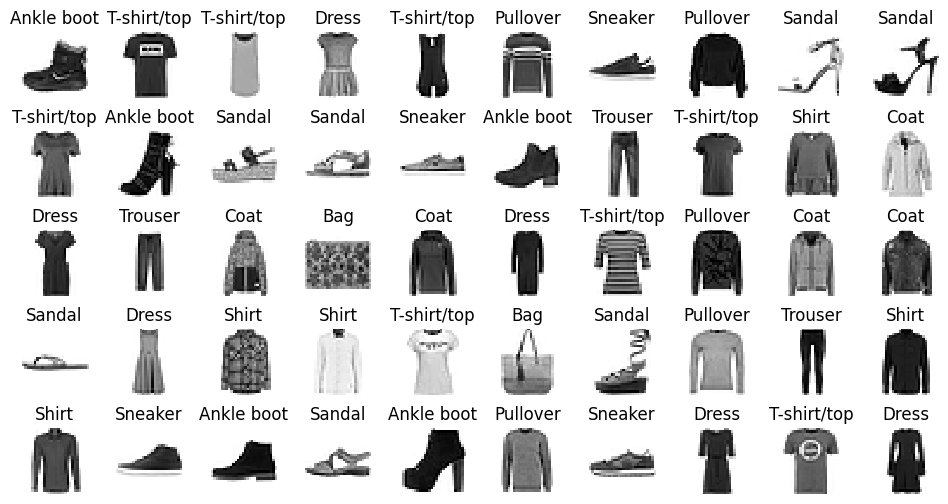

In [77]:
# Plotting an image in the dataset
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Here we use  TensorFlow's Keras API to build a sequential neural network model for classification tasks, specifically for image classification using the Fashion MNIST dataset. 

The model consists of four layers:
1. Input layer: Flattens the input image to a one-dimensional array of 784 features.
2. Hidden layer: A dense layer with 128 nodes and a rectified linear unit (ReLU) activation function, which helps the network learn non-linear relationships between the input features.
3. Hidden layer: Another dense layer with 64 nodes and ReLU activation function, which further learns non-linear relationships in the data.
4. Output layer: A dense layer with 10 nodes and a softmax activation function, which produces a probability distribution over the 10 possible classes.

The model takes an input image of size 28x28 pixels and produces an output probability distribution over the 10 possible classes, which are different types of clothing items. The model is trained using categorical cross-entropy loss and the Adam optimizer.


In [78]:
# If needed, clear the session to reset the name counters
# tf.keras.backend.clear_session()
# Set the random number generator seed
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # input layer (1)
    tf.keras.layers.Dense(128, activation="relu"), # hidden layer (2)
    tf.keras.layers.Dense(64, activation="relu"), # hidden layer (3)
    tf.keras.layers.Dense(10, activation="softmax") # output layer (4)
])

# Model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


The summary provides a detailed description of each layer in the network. The Layer (type) column displays the type of layer used in the network. The Output Shape column displays the shape of the output from each layer. The Param # column displays the number of trainable parameters in each layer.

In this specific case, the network has 3 dense layers, with 128, 64, and 10 nodes respectively. The first layer is a Flatten layer that converts the input data into a 1D array. The network has a total of 109,386 trainable parameters. The last row of the summary displays the total number of parameters in the network, trainable parameters, and non-trainable parameters.

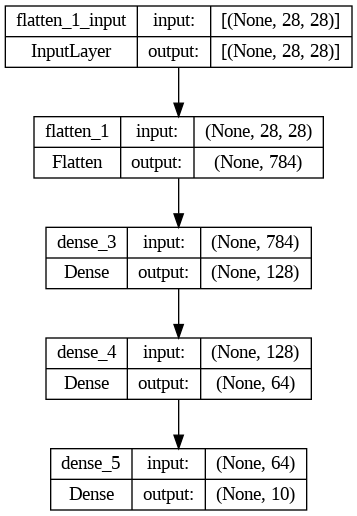

In [79]:
# Another way to show the model structure
tf.keras.utils.plot_model(model, "DNN_fashion_mnist_model.png", show_shapes=True)

In [80]:
# Inspect the layers
model.layers

Then we use `compile()` method to configure the learning process of the model. It requires three parameters:
- `optimizer`: It is used to specify the optimization algorithm used to train the model. In this case, `'adam'` is used which is a popular optimizer that performs well on various types of problems. You can also use `'sgd'` (stochastic gradient descent) instead. 
    Adam and SGD (Stochastic Gradient Descent) are both optimization algorithms used in training neural networks. In general, Adam is a good choice for training neural networks, especially for complex or noisy datasets. However, SGD can still be a good choice in certain situations, such as when training smaller neural networks on simpler datasets. The choice between the two ultimately depends on the specific task and dataset.
    - SGD is a simple optimization algorithm that updates the parameters in the direction of the negative gradient of the loss function. It works well when the data is linearly separable, but can struggle in cases where the cost surface is non-convex or has a lot of noise.
    - Adam, on the other hand, is an adaptive optimization algorithm that computes individual adaptive learning rates for different parameters based on estimates of the first and second moments of the gradients. It works well in cases where the cost surface is non-convex or has noisy gradients, and is generally faster than SGD.


- `loss`: It is used to specify the loss function that the model will try to minimize during training. For classification problems, `'sparse_categorical_crossentropy'` is a commonly used loss function.
- `metrics`: It is used to specify the metric(s) that will be used to evaluate the performance of the model. In this case, `'accuracy'` is used which is a commonly used metric for classification problems.


In [81]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5012 - accuracy: 0.8222 - val_loss: 0.4244 - val_accuracy: 0.8314
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3707 - accuracy: 0.8654 - val_loss: 0.3621 - val_accuracy: 0.8638
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3360 - accuracy: 0.8765 - val_loss: 0.3484 - val_accuracy: 0.8686
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3117 - accuracy: 0.8850 - val_loss: 0.3433 - val_accuracy: 0.8724
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8903 - val_loss: 0.3247 - val_accuracy: 0.8808
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2803 - accuracy: 0.8962 - val_loss: 0.3275 - val_accuracy: 0.8828
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2671 - accuracy: 0.9004 - val_loss: 0.3599 - val_accuracy

In [83]:
# History of parameters
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

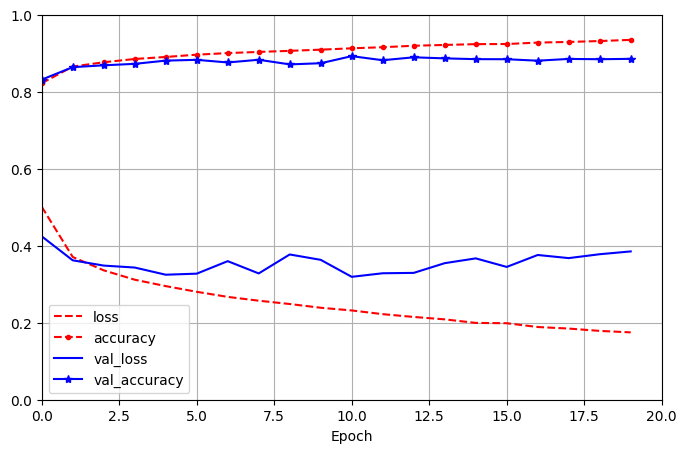

In [84]:
# Plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 20], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

313/313 [==============================] - 1s 2ms/step


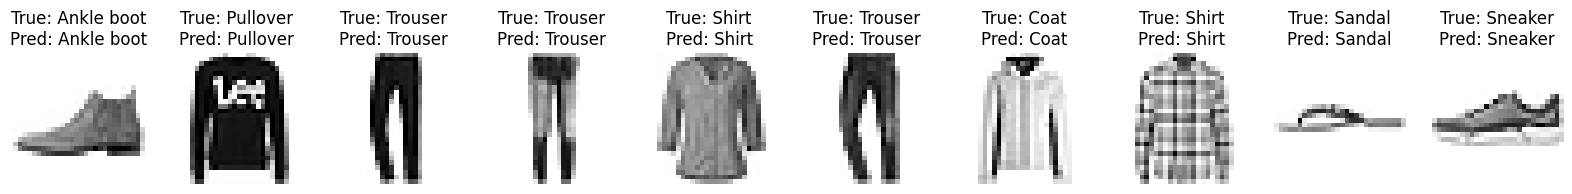

In [85]:
# Using the model to make predictions
y_proba = model.predict(X_test) # Predict the probabilities
y_pred = y_proba.argmax(axis=-1) # Predict the classes

# Plotting first 10 image in the testing dataset
n_rows = 1
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        predicted_class = class_names[y_pred[index]]
        true_class = class_names[y_test[index]]
        plt.title(f"True: {true_class}\nPred: {predicted_class}")
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()


In [86]:
# Evaluate the model on the test data using accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8841
Test accuracy: 0.8841000199317932


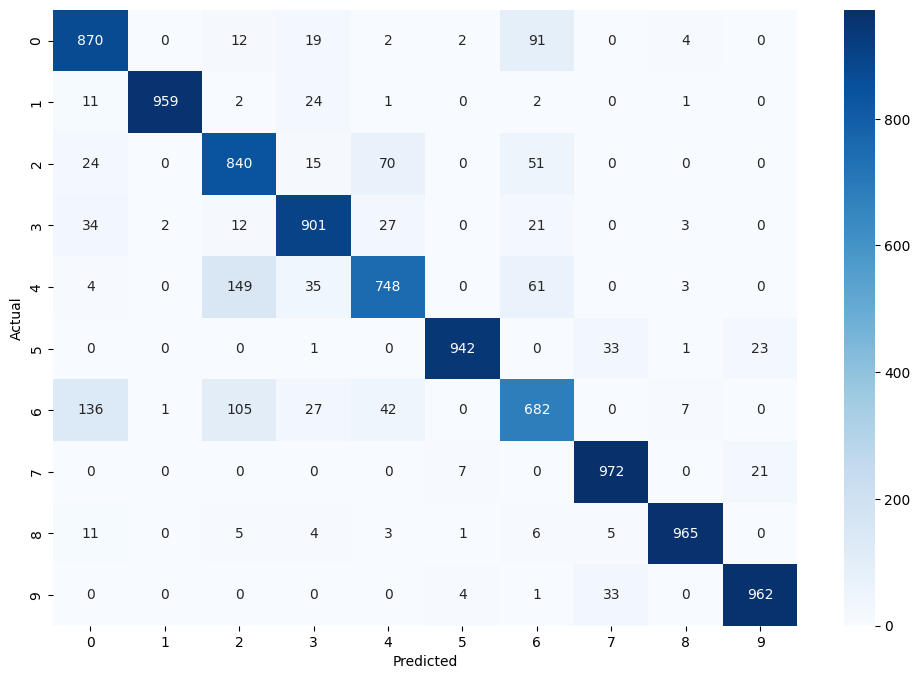

In [87]:
# Evaluate the model using confusing matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", ax=ax, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Pros and Cons

**Pros:**
- Can model complex, non-linear relationships
- Can handle high-dimensional data
- Scalable to large datasets

**Cons:**
- Requires a large amount of data
- Prone to overfitting
- Difficult to interpret

## Suitable Tasks and Datasets

DNNs are versatile and can handle a variety of tasks and datasets. Here are some examples:

1. **Binary and Multiclass Classification**: Dense Neural Networks can handle binary and multiclass classification tasks quite effectively. For instance, they can be used for digit recognition, image classification, sentiment analysis, etc.

2. **Regression**: They are also suitable for regression tasks where the goal is to predict a continuous output. For example, predicting house prices, stock prices, etc.

3. **Feature Learning**: Dense Neural Networks can learn to extract useful features from raw data. This makes them suitable for tasks where handcrafted features are difficult to create.

4. **Large Datasets**: Dense Neural Networks tend to perform better on larger datasets because they have the capacity to learn complex representations.

5. **High-Dimensional Data**: Dense Neural Networks are capable of handling high-dimensional data, such as images, audio, and text. They can learn hierarchical representations of the data, which helps in capturing complex patterns.

6. **Text and Time-Series Data**: Although Recurrent Neural Networks (RNNs) or Transformers are often more suitable for sequence data, Dense Neural Networks can still be used with some success, especially when sequence length is fixed and relatively short.

It is important to note that the performance of a Dense Neural Network is dependent on the quality and the quantity of the data, the network architecture, and the choice of hyperparameters.

## References
1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). [Deep learning](http://www.deeplearningbook.org/). MIT press.
2. Keras Documentation: [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/)
3. Keras Documentation: [Guide to the Sequential model](https://keras.io/models/sequential/)
4. TensorFlow Documentation: [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
5. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".